# Random Forest Classification

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, train_size = 0.7)

In [5]:
print(X_train)

[[    40  57000]
 [    24  58000]
 [    37  62000]
 [    26  16000]
 [    48  30000]
 [    25  80000]
 [    41  71000]
 [    33 149000]
 [    53  82000]
 [    37  52000]
 [    49  74000]
 [    49  39000]
 [    22  63000]
 [    19  70000]
 [    22  27000]
 [    38 112000]
 [    58 101000]
 [    22  18000]
 [    39  61000]
 [    35 108000]
 [    19  76000]
 [    37  72000]
 [    41  72000]
 [    35  72000]
 [    37  53000]
 [    52  90000]
 [    38  80000]
 [    40  59000]
 [    56 133000]
 [    37  75000]
 [    27  84000]
 [    56 104000]
 [    35  60000]
 [    37  57000]
 [    41  72000]
 [    22  55000]
 [    50  20000]
 [    40  72000]
 [    20  82000]
 [    27  57000]
 [    54  26000]
 [    40  75000]
 [    28  87000]
 [    42  64000]
 [    59  83000]
 [    46  28000]
 [    41  45000]
 [    47  34000]
 [    30  15000]
 [    59  88000]
 [    35  38000]
 [    35  61000]
 [    19  85000]
 [    42  53000]
 [    60  42000]
 [    43 133000]
 [    42  73000]
 [    51 146000]
 [    29 14800

In [6]:
print(X_test)

[[    46  74000]
 [    47  25000]
 [    59  29000]
 [    20  49000]
 [    27  89000]
 [    40  78000]
 [    51  23000]
 [    23  48000]
 [    44  39000]
 [    27  17000]
 [    41  60000]
 [    39  42000]
 [    46  88000]
 [    35  53000]
 [    26  32000]
 [    24  19000]
 [    30  49000]
 [    24  84000]
 [    37 137000]
 [    40  60000]
 [    32  86000]
 [    34  25000]
 [    29  80000]
 [    42  65000]
 [    33 113000]
 [    31  58000]
 [    42  54000]
 [    52 150000]
 [    41  79000]
 [    46  23000]
 [    44 139000]
 [    28  32000]
 [    42 104000]
 [    46  96000]
 [    35  88000]
 [    41  52000]
 [    30 107000]
 [    38  61000]
 [    35  91000]
 [    20  82000]
 [    49 141000]
 [    27 137000]
 [    35 147000]
 [    39  42000]
 [    49  28000]
 [    42  70000]
 [    19  26000]
 [    45 131000]
 [    35  75000]
 [    25  87000]
 [    28  55000]
 [    29  75000]
 [    36  60000]
 [    27  96000]
 [    47  30000]
 [    41  87000]
 [    24  55000]
 [    47 105000]
 [    31  1500

In [7]:
print(y_train)

[0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1
 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1
 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1]


In [8]:
print(y_test)

[0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1
 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 0 1 0 0 1 0]


## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
print(X_train)

[[ 0.20477268 -0.38318707]
 [-1.28933414 -0.35328395]
 [-0.07537235 -0.23367149]
 [-1.10257079 -1.6092148 ]
 [ 0.95182608 -1.19057119]
 [-1.19595247  0.30458459]
 [ 0.29815435  0.03545655]
 [-0.44889906  2.36789956]
 [ 1.41873446  0.36439082]
 [-0.07537235 -0.53270264]
 [ 1.04520776  0.1251659 ]
 [ 1.04520776 -0.92144315]
 [-1.47609749 -0.20376837]
 [-1.75624252  0.00555344]
 [-1.47609749 -1.28028053]
 [ 0.01800932  1.26148429]
 [ 1.88564284  0.93255002]
 [-1.47609749 -1.54940857]
 [ 0.111391   -0.2635746 ]
 [-0.2621357   1.14187183]
 [-1.75624252  0.18497213]
 [-0.07537235  0.06535967]
 [ 0.29815435  0.06535967]
 [-0.2621357   0.06535967]
 [-0.07537235 -0.50279953]
 [ 1.32535279  0.60361575]
 [ 0.01800932  0.30458459]
 [ 0.20477268 -0.32338084]
 [ 1.69887949  1.88944971]
 [-0.07537235  0.15506901]
 [-1.00918911  0.42419705]
 [ 1.69887949  1.02225936]
 [-0.2621357  -0.29347772]
 [-0.07537235 -0.38318707]
 [ 0.29815435  0.06535967]
 [-1.47609749 -0.4429933 ]
 [ 1.13858944 -1.48960234]
 

In [12]:
print(X_test)

[[ 0.76506273  0.1251659 ]
 [ 0.85844441 -1.34008676]
 [ 1.97902452 -1.2204743 ]
 [-1.66286085 -0.62241199]
 [-1.00918911  0.57371263]
 [ 0.20477268  0.24477836]
 [ 1.23197111 -1.39989299]
 [-1.38271582 -0.65231511]
 [ 0.57829938 -0.92144315]
 [-1.00918911 -1.57931169]
 [ 0.29815435 -0.29347772]
 [ 0.111391   -0.8317338 ]
 [ 0.76506273  0.54380952]
 [-0.2621357  -0.50279953]
 [-1.10257079 -1.13076495]
 [-1.28933414 -1.51950546]
 [-0.72904409 -0.62241199]
 [-1.28933414  0.42419705]
 [-0.07537235  2.00906218]
 [ 0.20477268 -0.29347772]
 [-0.54228073  0.48400328]
 [-0.35551738 -1.34008676]
 [-0.82242576  0.30458459]
 [ 0.39153603 -0.14396214]
 [-0.44889906  1.2913874 ]
 [-0.63566241 -0.35328395]
 [ 0.39153603 -0.47289641]
 [ 1.32535279  2.39780268]
 [ 0.29815435  0.27468148]
 [ 0.76506273 -1.39989299]
 [ 0.57829938  2.06886841]
 [-0.91580744 -1.13076495]
 [ 0.39153603  1.02225936]
 [ 0.76506273  0.78303444]
 [-0.2621357   0.54380952]
 [ 0.29815435 -0.53270264]
 [-0.72904409  1.11196871]
 

## Training the Random Forest Classification model on the Training set

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, random_state = 3, criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=3)

## Predicting a new result

In [15]:
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


## Predicting the Test set results

In [17]:
y_pred = classifier.predict(X_test)

print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]]


## Making the Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[69  9]
 [ 7 35]]
0.8666666666666667


## Visualising the Training set results

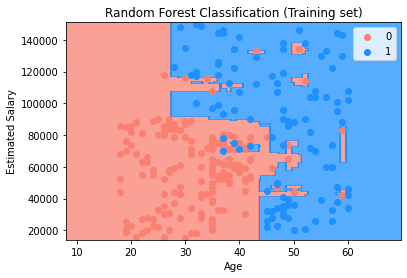

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

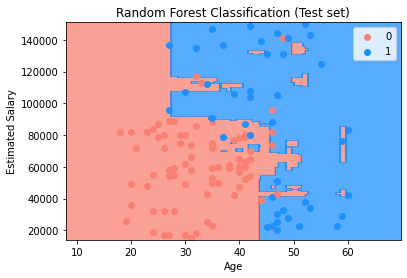

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()